In [2]:
# Import libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
# Read in loans data
loans = pd.read_csv('loan_data.csv')
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [76]:
# View summary of statistics for dataframe
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analysis

Text(0.5, 0, 'FICO')

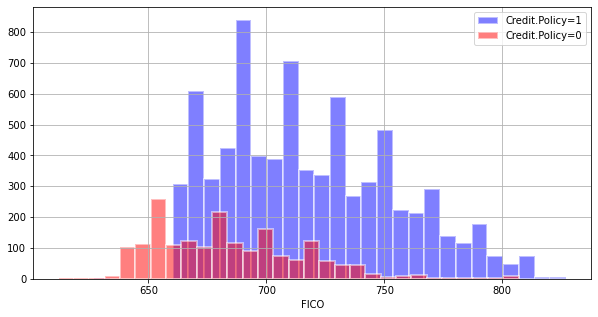

In [109]:
# Create histogram of two FICO dsitributions for each credit.policy outcome
plt.figure(figsize=(10,5))

loans[loans['credit.policy']==1]['fico'].hist(bins=30, alpha=0.5, 
                                              color='blue', label='Credit.Policy=1',
                                             edgecolor='white', linewidth=2)
loans[loans['credit.policy']==0]['fico'].hist(bins=30, alpha=0.5, 
                                              color='red', label='Credit.Policy=0',
                                             edgecolor='white', linewidth=2)

plt.legend()
plt.xlabel('FICO')

** Create a similar figure, except this time select by the not.fully.paid column.**

Text(0, 0.5, 'Count')

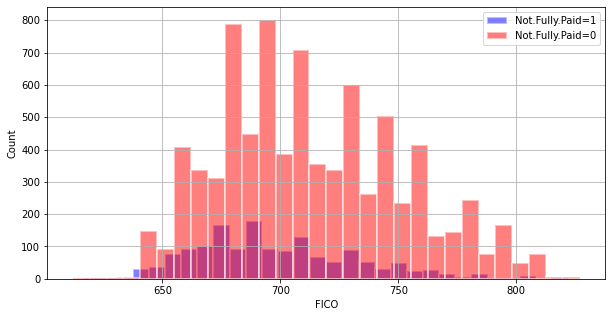

In [110]:
# Create histogram of two FICO dsitributions for each not.full.paid outcome
plt.figure(figsize=(10,5))

loans[loans['not.fully.paid']==1]['fico'].hist(bins=30, alpha=0.5, 
                                              color='blue', label='Not.Fully.Paid=1',
                                              edgecolor='white', linewidth=2)
loans[loans['not.fully.paid']==0]['fico'].hist(bins=30, alpha=0.5, 
                                              color='red', label='Not.Fully.Paid=0',
                                              edgecolor='white', linewidth=2)

plt.legend()
plt.xlabel('FICO')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

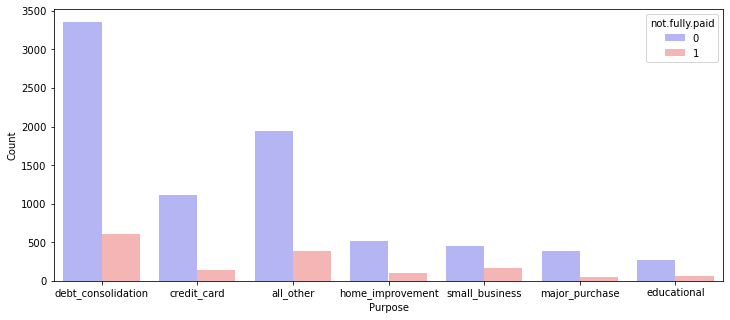

In [113]:
# Create countplot showing counts of loans by purpose and not.fully.paid outcome
plt.figure(figsize=(12,5))
sns.countplot(data=loans, x='purpose', hue='not.fully.paid', palette='bwr')
plt.xlabel('Purpose')
plt.ylabel('Count')

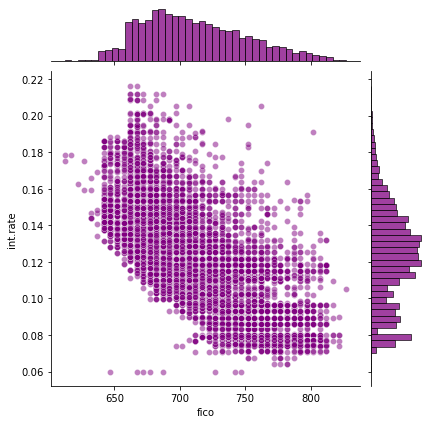

In [117]:
# Create jointplot to see relationship between FICO score and interest rate
sns.jointplot(x='fico', y='int.rate', data=loans, color='purple', alpha=0.5)

<Figure size 792x504 with 0 Axes>

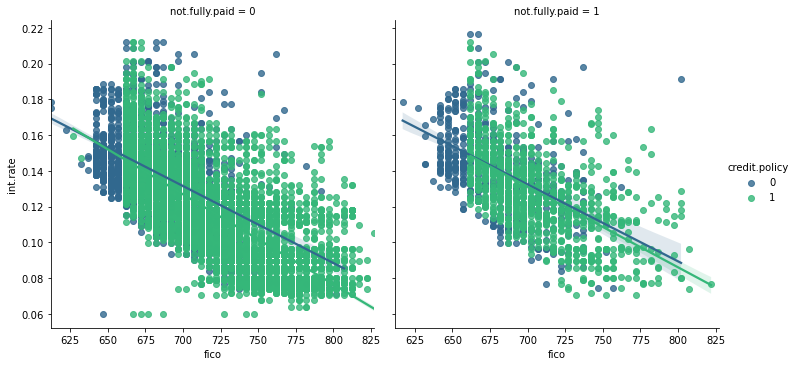

In [46]:
# View trend between not.fully.paid and credit.policy outcomes
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='viridis')

# Decision Tree Model
## Training

In [87]:
# Create dummy variables for 'purpose' column
cat_feats = ['purpose']
final_data = pd.get_dummies(loans, columns=cat_feats, drop_first=True)

In [53]:
from sklearn.model_selection import train_test_split

In [88]:
# Create train and test data
x = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
# Create decision tree and fit it to training data
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

## Predictions and Evaluation

In [92]:
# Create predictions
tree_predicts = dtree.predict(x_test)

In [63]:
from sklearn.metrics import classification_report, confusion_matrix

In [94]:
# Evaluate model
print(classification_report(y_test, tree_predicts))
print('\n')
print(confusion_matrix(y_test, tree_predicts))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      2431
           1       0.18      0.23      0.20       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



[[1984  447]
 [ 343  100]]


# Random Forest Model
## Training

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
# Create random forest model and fit it to training data
rforest = RandomForestClassifier()
rforest.fit(x_train, y_train)

RandomForestClassifier()

## Predictions and Evaluation

In [99]:
# Create predictions
forest_predicts = rforest.predict(x_test)

In [100]:
# Evaluate model
print(classification_report(y_test, forest_predicts))
print('\n')
print(confusion_matrix(y_test, forest_predicts))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2431
           1       0.35      0.02      0.03       443

    accuracy                           0.84      2874
   macro avg       0.60      0.51      0.47      2874
weighted avg       0.77      0.84      0.78      2874



[[2418   13]
 [ 436    7]]


**What performed better - the random forest or the decision tree?**

Depends on which metrics are we want to optimize for. The random forest performed better for precision, f1-score, and accuracy, but both models have very poor recall. More feature engineering is needed to improve both models.